## Image Classification `CNN` + `Tansfare Learning`
> Classifying image from our own dataset with `10` classes.

### Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os, random
import matplotlib.pyplot as plt
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

> We are going to use `ImageDataGenerator` to preprocess our images so the file structures should look as follows

```
data
    class_1:
        - image
        - image
    ...
    class_n:
        - image
        - image
        ...
```

In [11]:
class Electronics:
    IMAGES_PATH = 'data_mixed'
    IMAGES_BALANCED = 'data'
    TRAIN = 'data/train'
    VALIDATION = 'data/validation'
    TEST = './test'

In [12]:
class_names = os.listdir(Electronics.IMAGES_PATH)
class_names

['camera',
 'cellphone',
 'charger',
 'desktop',
 'drone',
 'headphone',
 'laptop',
 'mouse',
 'remote',
 'television']

> We want to come up with the following structure on our image `files`

```
data-
    train -
        class_1
            -img1
            -img2
            -img3
            -...
        class_2
            -...
    test -
        -img1
        -img2
        -img3
    validation -
        class_1
            -img1
            -img2
            -img3
            -...
        class_2
            -...
```

* We are going to move files around using code, and make sure that we have `100` images for each class for `training`
`20` images for each class for `testing` and `20` images for each class for `validation`

#### Folders Achitecture
<p align="center">
<img src="https://miro.medium.com/max/700/1*HpvpA9pBJXKxaPCl5tKnLg.jpeg"/>
</p>

> As you can see in the above picture, the test folder should also contain a single folder inside which all the test images are present(Think of it as “unlabeled” class , this is there because the flow_from_directory() expects at least one directory under the given directory path).

In [13]:
train_size = 50
test_size = 10
validation_size = 10

In [14]:
if os.path.exists(Electronics.TRAIN) == False:
    os.makedirs(Electronics.TRAIN)
    
if os.path.exists(Electronics.TEST) == False:
    os.makedirs(Electronics.TEST)

if os.path.exists(Electronics.VALIDATION) == False:
    os.makedirs(Electronics.VALIDATION)
    
print("Done.")

Done.


In [15]:
for cate in ["laptop", "desktop", "cellphone"]: # 3 classes for simplicity
    for i in range(train_size):
        images_paths = os.listdir(os.path.join(Electronics.IMAGES_PATH, cate))
        random.shuffle(images_paths)
        image_path = os.path.join(os.path.join(Electronics.IMAGES_PATH, cate), images_paths[0])
        if os.path.exists(os.path.join(Electronics.TRAIN, cate)) == False:
            os.makedirs(os.path.join(Electronics.TRAIN, cate))
        shutil.move(f'{image_path}', f'{Electronics.TRAIN}/{cate}/{images_paths[0]}')
    print(f"Sucess\nMoved:\t\t{train_size} images\nCategory:\t{cate}\nFrom:\t\t{Electronics.IMAGES_PATH+'/'+cate}\nTo\t\t{Electronics.TRAIN}\n\n")   
  
    for i in range(validation_size):
        images_paths = os.listdir(os.path.join(Electronics.IMAGES_PATH, cate))
        random.shuffle(images_paths)
        image_path = os.path.join(os.path.join(Electronics.IMAGES_PATH, cate), images_paths[0])
        if os.path.exists(os.path.join(Electronics.VALIDATION, cate)) == False:
            os.makedirs(os.path.join(Electronics.VALIDATION, cate))
        shutil.move(f'{image_path}', f'{Electronics.VALIDATION}/{cate}/{images_paths[0]}')
    print(f"Sucess\nMoved:\t\t{validation_size} images\nCategory:\t{cate}\nFrom:\t\t{Electronics.IMAGES_PATH+'/'+cate}\nTo\t\t{Electronics.VALIDATION}\n\n")   
    
    for i in range(test_size):
        images_paths = os.listdir(os.path.join(Electronics.IMAGES_PATH, cate))
        random.shuffle(images_paths)
        image_path = os.path.join(os.path.join(Electronics.IMAGES_PATH, cate), images_paths[0])
        shutil.move(f'{image_path}', f'{Electronics.TEST}')
    print(f"Sucess\nMoved:\t\t{test_size} images\nCategory:\t{cate}\nFrom:\t\t{Electronics.IMAGES_PATH+'/'+cate}\nTo\t\t{Electronics.TEST}\n\n")   

print("Done.")      

Sucess
Moved:		50 images
Category:	camera
From:		data_mixed/camera
To		data/train


Sucess
Moved:		10 images
Category:	camera
From:		data_mixed/camera
To		data/validation


Sucess
Moved:		10 images
Category:	camera
From:		data_mixed/camera
To		./test


Sucess
Moved:		50 images
Category:	laptop
From:		data_mixed/laptop
To		data/train


Sucess
Moved:		10 images
Category:	laptop
From:		data_mixed/laptop
To		data/validation


Sucess
Moved:		10 images
Category:	laptop
From:		data_mixed/laptop
To		./test


Sucess
Moved:		50 images
Category:	desktop
From:		data_mixed/desktop
To		data/train


Sucess
Moved:		10 images
Category:	desktop
From:		data_mixed/desktop
To		data/validation


Sucess
Moved:		10 images
Category:	desktop
From:		data_mixed/desktop
To		./test


Sucess
Moved:		50 images
Category:	mouse
From:		data_mixed/mouse
To		data/train


Sucess
Moved:		10 images
Category:	mouse
From:		data_mixed/mouse
To		data/validation


Sucess
Moved:		10 images
Category:	mouse
From:		data_mixed/mouse
T

> Creating `ImageDataGenerator` for each sample

In [45]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
    fill_mode="nearest",
    
)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode="nearest",
    
)

In [46]:
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(224, 224),
        batch_size=8,
        class_mode="categorical"
)
validation_generator = validation_datagen.flow_from_directory(
        'data/validation',
        target_size=(224, 224),
        batch_size=8,
        class_mode="categorical"
)
test_generator = test_datagen.flow_from_directory(
        '.',
        target_size=(224, 224),
        classes=["test"],
        batch_size = 1
)


Found 150 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 70 images belonging to 1 classes.


In [20]:
test_generator.filenames[:2]

['test\\camera102.png', 'test\\camera114.png']

In [21]:
test_generator[0][1]

array([[1.]], dtype=float32)

> ``Model`` Creation ``CNN``

In [47]:
model = keras.Sequential([
    keras.layers.Input(shape=(224, 224, 3)),
    keras.layers.Conv2D(32, (2, 2), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(128, (2, 2), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 223, 223, 32)      416       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 110, 110, 64)      8256      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 54, 54, 128)       32896     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 27, 27, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 64)       

In [48]:
model.compile(
    metrics=["accuracy"],
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.CategoricalCrossentropy(),
)

In [49]:
EPOCHS = 5

history = model.fit(train_generator,batch_size=8, validation_data=validation_generator, epochs=EPOCHS)

Epoch 1/5
19/19 [==============================] - 47s 2s/step - loss: 1.1444 - accuracy: 0.3143 - val_loss: 1.0976 - val_accuracy: 0.3333
Epoch 2/5
19/19 [==============================] - 15s 765ms/step - loss: 1.0982 - accuracy: 0.3145 - val_loss: 1.0962 - val_accuracy: 0.3000
Epoch 3/5
19/19 [==============================] - 14s 729ms/step - loss: 1.0927 - accuracy: 0.3320 - val_loss: 1.0748 - val_accuracy: 0.4667
Epoch 4/5
19/19 [==============================] - 13s 684ms/step - loss: 0.9375 - accuracy: 0.5662 - val_loss: 0.9898 - val_accuracy: 0.5000
Epoch 5/5
19/19 [==============================] - 13s 670ms/step - loss: 0.7761 - accuracy: 0.6788 - val_loss: 1.0279 - val_accuracy: 0.5333


In [50]:
import pandas as pd

<AxesSubplot:>

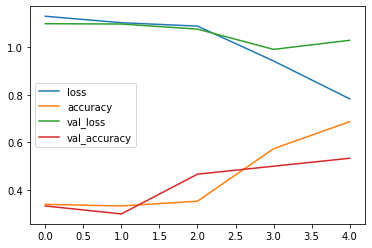

In [51]:
pd.DataFrame(history.history).plot()

In [35]:
predictions = tf.argmax(model.predict(test_generator), axis=1)
predictions

<tf.Tensor: shape=(70,), dtype=int64, numpy=
array([5, 6, 4, 6, 1, 5, 6, 0, 5, 4, 1, 4, 6, 3, 3, 1, 4, 4, 2, 2, 1, 4,
       4, 6, 5, 6, 4, 4, 6, 2, 4, 0, 6, 0, 6, 1, 0, 2, 6, 1, 5, 5, 5, 1,
       1, 2, 0, 3, 6, 5, 5, 3, 5, 4, 6, 6, 5, 2, 4, 5, 0, 4, 2, 3, 3, 4,
       1, 6, 5, 6], dtype=int64)>

(224, 224, 3)


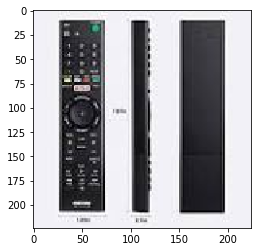

In [36]:
print(test_generator[0][0][0].shape)
plt.imshow(test_generator[2][0][0])

### `Transfer Learning` using `VGG16` model.

In [31]:
base_model = keras.applications.vgg16.VGG16()
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

> Create a `Sequential` model.

In [37]:
model2 = keras.Sequential()

> And the layers from the `pretrained` model exept the output layer.

In [39]:
for layer in base_model.layers[0:-1]:
    model2.add(layer)
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

> Freeze the model by turning `trainable = False` we don't want to retrain the layers again.

In [40]:
for layer in model2.layers:
    layer.trainable = False
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

> Creating our `output` layer with 7 classes and add it to the model.

In [52]:
output_layer = tf.keras.layers.Dense(3, activation='softmax')
model.add(output_layer)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 223, 223, 32)      416       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 110, 110, 64)      8256      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 54, 54, 128)       32896     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 27, 27, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 64)       

> Compile the `model`.

In [53]:
model2.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['acc']
)

> `Train` the model.

In [54]:
EPOCHS = 5
history = model.fit(train_generator,batch_size=8, validation_data=validation_generator, epochs=EPOCHS)

Epoch 1/5
19/19 [==============================] - 15s 776ms/step - loss: 0.6070 - accuracy: 0.7733 - val_loss: 1.9293 - val_accuracy: 0.5667
Epoch 2/5
19/19 [==============================] - 13s 687ms/step - loss: 0.3719 - accuracy: 0.8533 - val_loss: 2.1310 - val_accuracy: 0.5000
Epoch 3/5
19/19 [==============================] - 13s 705ms/step - loss: 0.2086 - accuracy: 0.9600 - val_loss: 2.5247 - val_accuracy: 0.6000
Epoch 4/5
19/19 [==============================] - 13s 683ms/step - loss: 0.1654 - accuracy: 0.9400 - val_loss: 3.2807 - val_accuracy: 0.5000
Epoch 5/5
19/19 [==============================] - 14s 745ms/step - loss: 0.0968 - accuracy: 0.9667 - val_loss: 3.3399 - val_accuracy: 0.4333


> The model is still **over-fitting** 😭😭😭